In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/raw/claims-data-2015-as-of-feb-9-2016.xlsx')
df

,Claim Number,Date Received,Incident D,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item Category,Close Amount,Disposition
0,2015060222904,2015-05-28,2015-05-21,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Electronics,0,Deny
1,2015082725115,2015-08-21,2015-08-01,ABE,"Lehigh Valley International Airport, Allentown",-,Property Damage,Checked Baggage,Sporting Equipment & Supplies,180,Settle
2,2015102326219,2015-10-07,2015-10-02,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Passenger Property Loss,Checked Baggage,Clothing,60,Approve in Full
3,2015122027695,2015-10-27,2015-10-19,ABE,"Lehigh Valley International Airport, Allentown",Allegiant Air,Property Damage,Checkpoint,Personal Accessories,-,-
4,2015012220065,2015-01-22,2014-12-23,ABI,Abilene Regional,American Airlines,Property Damage,Checked Baggage,Home Decor,0,Deny
...,...,...,...,...,...,...,...,...,...,...,...
8662,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,"Baggage/Cases/Purses; Books, Magazines & Other...",-,-
8663,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-
8664,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-
8665,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   8667 non-null   int64         
 1   Date Received  8667 non-null   datetime64[ns]
 2   Incident D     8667 non-null   datetime64[ns]
 3   Airport Code   8667 non-null   object        
 4   Airport Name   8667 non-null   object        
 5   Airline Name   8667 non-null   object        
 6   Claim Type     8667 non-null   object        
 7   Claim Site     8667 non-null   object        
 8   Item Category  8667 non-null   object        
 9   Close Amount   8667 non-null   object        
 10  Disposition    8667 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 744.9+ KB


In [4]:
top = df[~df.isin(['-']).any(axis=1)]

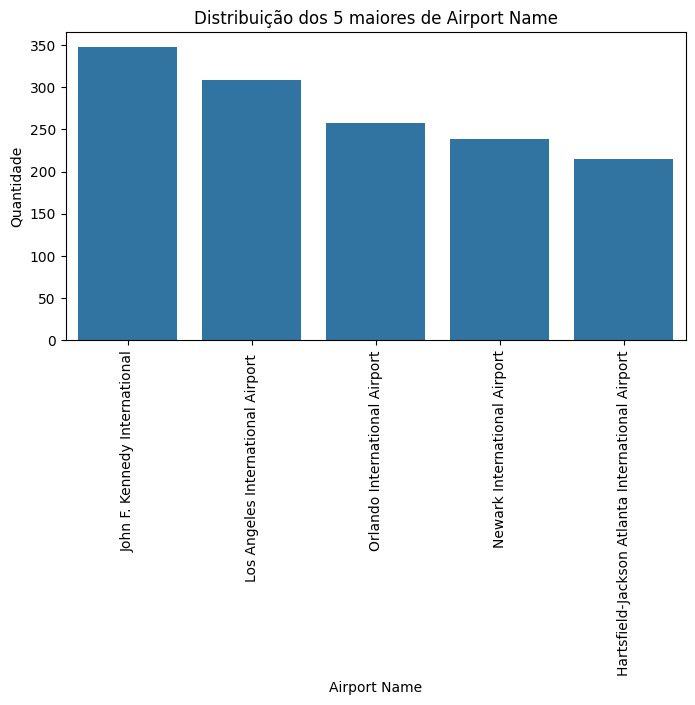

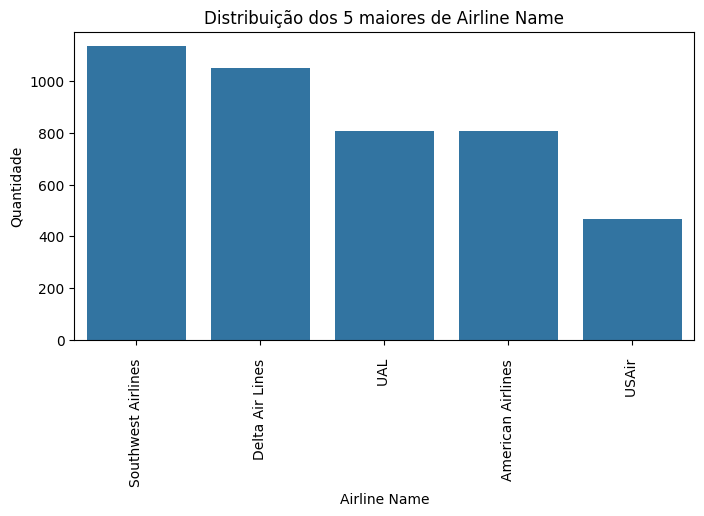

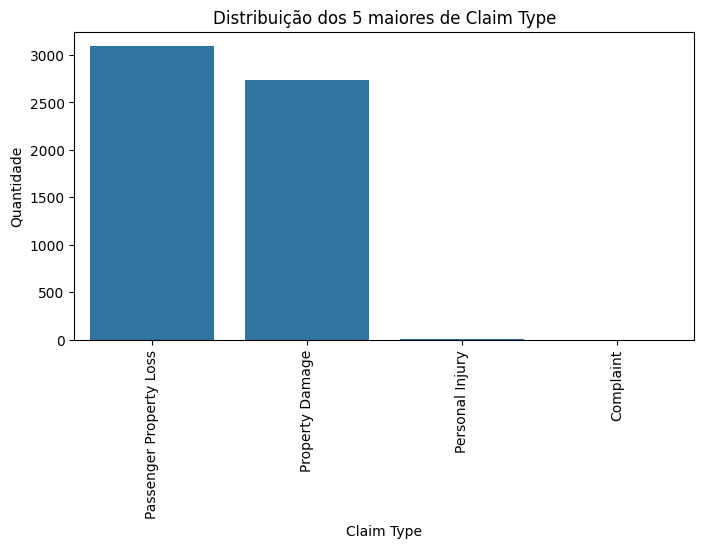

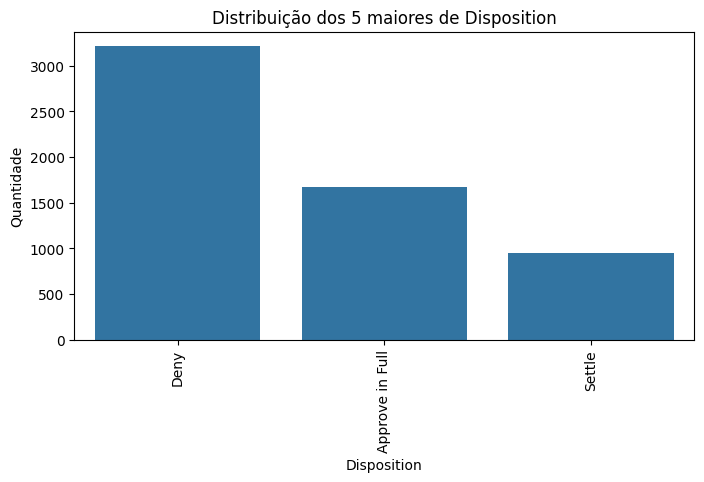

In [6]:
categories_columns = ['Airport Name','Airline Name', 'Claim Type', 'Disposition']

for col in categories_columns:
    top5 = top[col].value_counts().nlargest(5).index
    plt.figure(figsize=(8,4))
    sns.countplot(data=top, x=col, order=top5)
    plt.title(f'Distribuição dos 5 maiores de {col}')
    plt.xticks(rotation=90)
    plt.ylabel('Quantidade')
    plt.show()

In [7]:
df['Date Received'] = pd.to_datetime(df['Date Received'], errors='coerce')

claims_over_time = df.groupby(df['Date Received'].dt.to_period('M')).size().reset_index(name='total_reclamacoes')

claims_over_time['Date Received'] = claims_over_time['Date Received'].dt.to_timestamp()

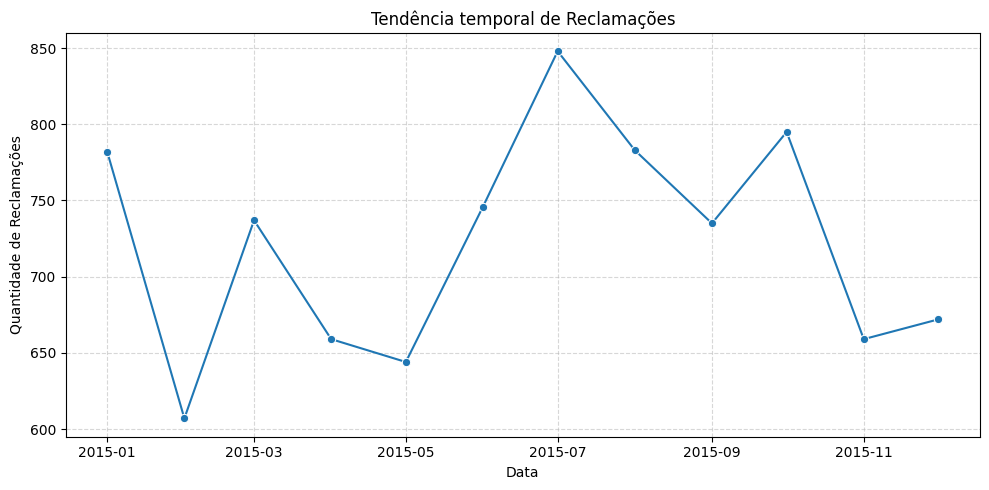

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=claims_over_time, x='Date Received', y='total_reclamacoes', marker='o')
plt.title('Tendência temporal de Reclamações')
plt.xlabel('Data')
plt.ylabel('Quantidade de Reclamações')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
incidents = df[df['Incident D'].dt.year == 2015].copy()

In [10]:
incidents['Incident D'] = pd.to_datetime(incidents['Incident D'], errors='coerce')

claims_over_time = incidents.groupby(incidents['Incident D'].dt.to_period('M')).size().reset_index(name='total_incidentes')

claims_over_time['Incident D'] = claims_over_time['Incident D'].dt.to_timestamp()

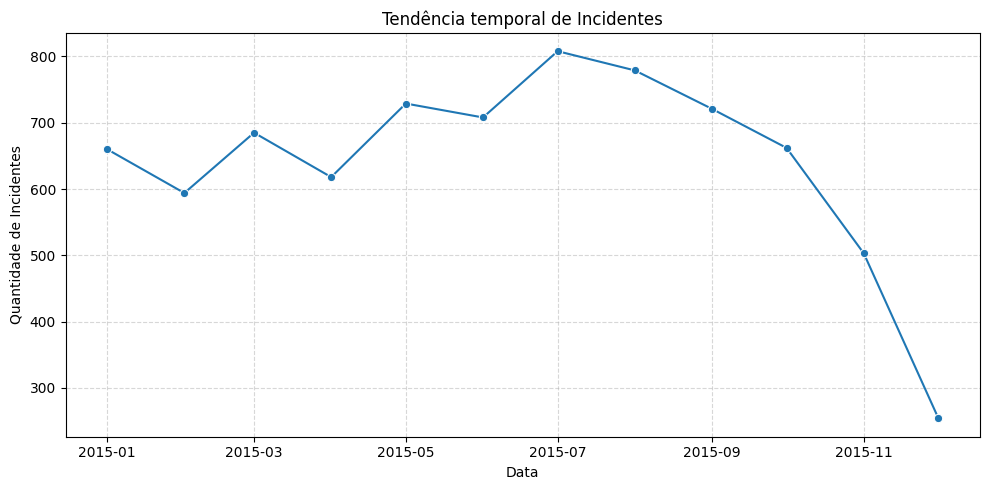

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=claims_over_time, x='Incident D', y='total_incidentes', marker='o')
plt.title('Tendência temporal de Incidentes')
plt.xlabel('Data')
plt.ylabel('Quantidade de Incidentes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()